In [101]:
import pandas as pd
import numpy as np
import scipy
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pickle

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import NearestNeighbors




nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gautamvenkatesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gautamvenkatesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [102]:
names = ["Uniq Id", "Crawl Timestamp", "Pageurl", "Website", "Title", "Num Of Reviews", "Average Rating", "Number Of Ratings", "Model Num", "Sku", "Upc", "Manufacturer", "Model Name", "Price", "Monthly Price", "Stock", "Carrier", "Color Category"," Internal Memory", "Screen Size", "Specifications", "Five Star", "Four Star", "Three Star", "Two Star", "One Star", "Discontinued", "Broken Link", "Seller Rating", "Seller Num Of Reviews", "extra"]

df_raw = pd.read_csv("../data/marketing_sample_for_ebay_com-ebay_com_product__20210101_20210331__30k_data.csv", names=names, skiprows=[0])

df = df_raw[['Uniq Id', 'Pageurl', 'Title', 'Num Of Reviews', 'Average Rating', 'Price', 'Specifications']]
df.head(10)

,Uniq Id,Pageurl,Title,Num Of Reviews,Average Rating,Price,Specifications
0,38c0bcb6ce1e5d1750b442dd9446aac9,https://www.ebay.com/p/7024512090?iid=16461748...,Samsung Galaxy Note 8 6GB RAM 64GB Dual SIM (U...,NaN,NaN,$369.08,NaN
1,31be03c526b3b65322e73ce617fa0e57,https://www.ebay.com/itm/Apple-Airpods-Pro-wit...,Apple Airpods Pro with wireless charging case ...,NaN,NaN,$245.00,NaN
2,5f2eacffc44070e54ef3195d4e3889d1,https://www.ebay.com/p/238211749?iid=174232921...,"Apple iPad Pro 1st Gen. 64GB, Wi-Fi + 4G (Unlo...",NaN,NaN,$431.24,NaN
3,63769e57a0c804cd2871d813a835ed2b,https://www.ebay.com/itm/Nintendo-wii-console-...,Nintendo wii console fit board and games bundle,NaN,NaN,$108.73,NaN
4,dd01861b46b2d5f2d24a64c1f64c5564,https://www.ebay.com/itm/Fossil-smart-watch/16...,Fossil smart watch,NaN,NaN,$200.00,NaN
5,8c68dfe9580d23ced8b5fe4c2d8cc36d,https://www.ebay.com/p/28032166820?iid=2746123...,Samsung SM-R170NZWAROM Earphones Buds - White ...,NaN,NaN,$117.41,NaN
6,ea6bc156a1ec1cdb98dc32af43fc5478,https://www.ebay.com/p/22040938184?iid=3337799...,Ring Video Doorbell Elite - Ethernet Power 108...,NaN,NaN,$189.00,NaN
7,74d4d03defd808e2f32d5bddc92a4476,https://www.ebay.com/p/239080946?iid=363277979...,Apple iPhone X - 256GB - Space Grey (Vodafone)...,NaN,NaN,$413.73,NaN
8,bc2bd4a6db2e818996b147b7668688d7,https://www.ebay.com/itm/For-Chromecast-4th-Ge...,For Chromecast 4th Generation 1080HD HDMI Medi...,NaN,NaN,$16.95,NaN
9,4581b1201a4de9dfd33fe328996f51e7,https://www.ebay.com/itm/Cinturino-di-ricambio...,Cinturino di ricambio in silicone per Garmin S...,NaN,NaN,$7.24,NaN


In [103]:
# Cleaning

df = df.dropna(subset=['Title', 'Price'])
df['Price'] = df['Price'].apply(lambda p: float(p.replace('$', '').replace(',', '')))


In [104]:
# Text Cleaning
sw = set(stopwords.words('english'))

df['title_tok'] = df['Title'].apply(lambda title: re.sub(r'\s+', ' ', re.sub('[^A-Za-z0-9]', ' ', 
           title.strip().lower())).strip())
df['title_tok'] = df['title_tok'].apply(word_tokenize)
df['title_tok'] = df['title_tok'].apply(lambda word_l: [w for w in word_l if w not in sw])
df['title_tok'] = df['title_tok'].apply(lambda word_l: " ".join(word_l))

In [105]:
# Bag of words implement

count_vec = CountVectorizer()
tfidf_transformer = TfidfTransformer()
nn = NearestNeighbors(algorithm='brute', metric="cosine")

count_matrix = count_vec.fit_transform(df['title_tok'])
title_tfidf = tfidf_transformer.fit_transform(count_matrix)
clf = nn.fit(title_tfidf)

df['title_tok_vec'] = title_tfidf.getnnz()

<AxesSubplot: >

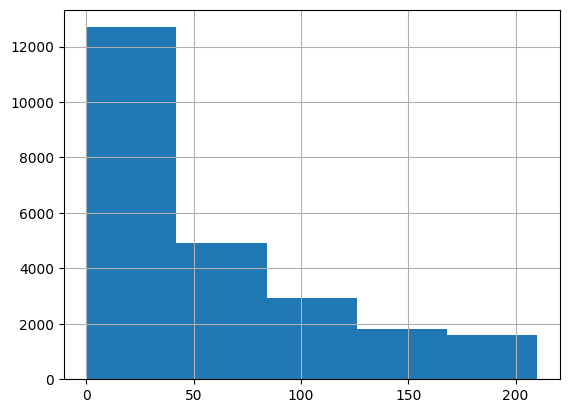

In [64]:
# Distribution of Ebay prices (without outliers)

max_v = np.percentile(df['Price'], 0.75) + 1.5 * scipy.stats.iqr(df['Price'])
df['Price'].hist(bins=np.arange(0, max_v, max_v // 5))
